In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use ('dark_background')

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 14
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [2]:
data = pd.read_csv('../data/processed_train.csv')
data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


In [3]:
data.HasDetections.value_counts()

HasDetections
0    99940
1    20012
Name: count, dtype: int64

Разделим выборку на тренировочную и тестовую

In [7]:
y = data['HasDetections']
X = data.drop('HasDetections', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     shuffle=True, 
                                                     random_state=1)

Обучите логистическую регрессию на тренировочной части наших данных, используя класс `LogisticRegression` из `sklearn.linear_model` с `l2` регуляризацией и коэффициентом регуляризации `C=0.01`. Ваш estimator должен нормировать данные по статистикам, рассчитывающимся на тренировочной выборке. Придется использовать конструкцию `Pipeline`. Положите все в переменную `pipe`.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

### Your code is here

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression(penalty='l2'))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('LR', LogisticRegression())])

In [30]:
pipe.set_params(LR__C=0.01)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(C=0.01))])

In [31]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('LR', LogisticRegression(C=0.01))],
 'verbose': False,
 'scaler': StandardScaler(),
 'LR': LogisticRegression(C=0.01),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'LR__C': 0.01,
 'LR__class_weight': None,
 'LR__dual': False,
 'LR__fit_intercept': True,
 'LR__intercept_scaling': 1,
 'LR__l1_ratio': None,
 'LR__max_iter': 100,
 'LR__multi_class': 'auto',
 'LR__n_jobs': None,
 'LR__penalty': 'l2',
 'LR__random_state': None,
 'LR__solver': 'lbfgs',
 'LR__tol': 0.0001,
 'LR__verbose': 0,
 'LR__warm_start': False}

Постройте ROC-кривую с помощью `RocCurveDisplay` и посчитайте `ROC-AUC` любым из показанных на практике способов. Один из вариантов - построить кривую с помощью `roc_curve` из `sklearn.metrics` и массивы пар `tpr-fpr` передать в `auc` из того же модуля `sklearn`. Проделайте эту операцию как для предсказаний на трейне, так и на тесте!

P.S. `roc_curve` необходимо скормить истинные метки классов (y_train/y_test), а также предсказанные вероятности (воспользуйтесь методом `predict_proba`)

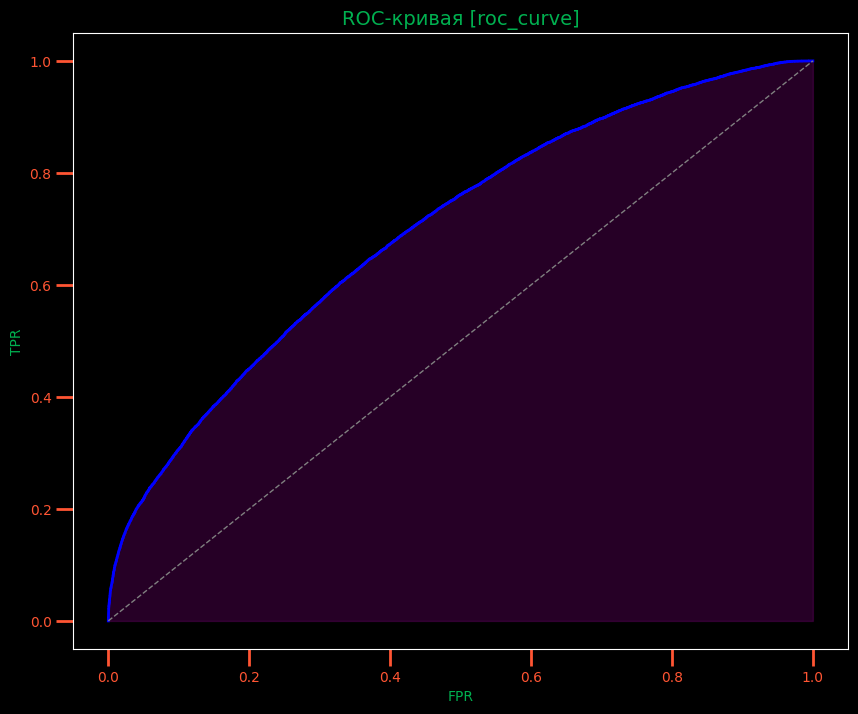

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 

### На трейне
### Your code is here

fpr, tpr, thresholds = roc_curve(y_train, pipe.predict_proba(X_train)[:, 1])

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.fill_between(fpr, tpr, color='purple', alpha=0.3)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая [roc_curve]')

plt.show()


In [34]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.6990488586642646

In [40]:
from sklearn.metrics import accuracy_score

# Получить вероятности принадлежности к каждому классу
probs = pipe.predict_proba(X_test)

# Принять решение о классификации на основе порога 0.5
predicted_labels = (probs[:, 1] >= 0.5).astype(int)

# Вычислить accuracy
accuracy = accuracy_score(y_test, predicted_labels)
accuracy

0.842203548085901

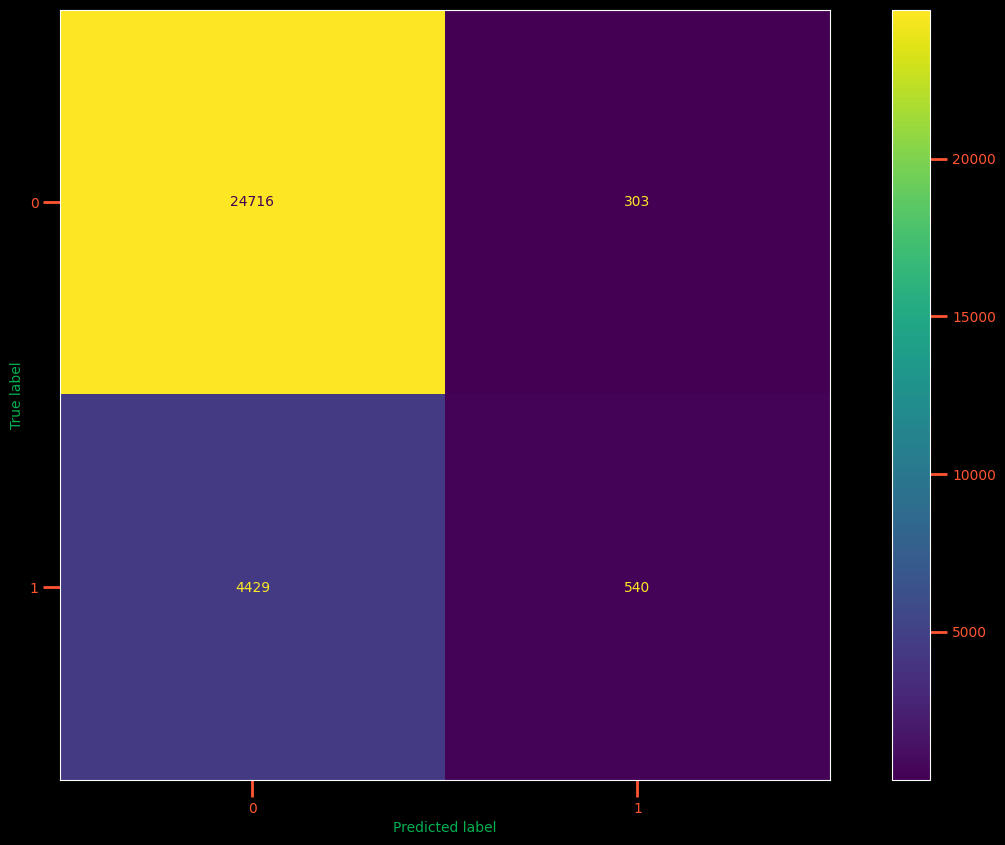

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_labels, labels=pipe.classes_)

cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fid, ax = plt.subplots(figsize=(16, 10))
cmp.plot(ax=ax)
plt.show()

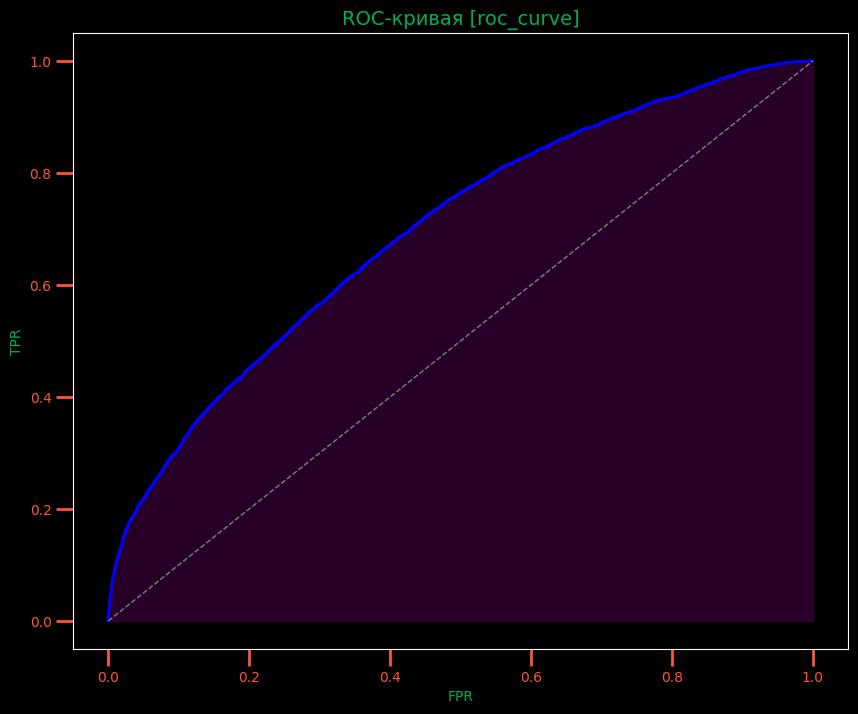

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 

### На трейне
### Your code is here

fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.fill_between(fpr, tpr, color='purple', alpha=0.3)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая [roc_curve]')

plt.show()

In [37]:
auc(fpr, tpr)

0.6968080149607528

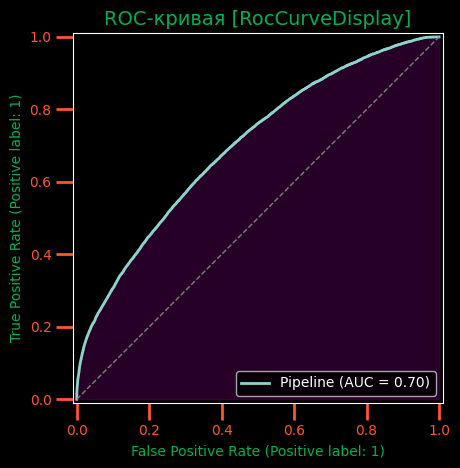

In [33]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipe, X_train, y_train)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.fill_between(fpr, tpr, color='purple', alpha=0.3)

plt.title('ROC-кривая [RocCurveDisplay]')

plt.show()

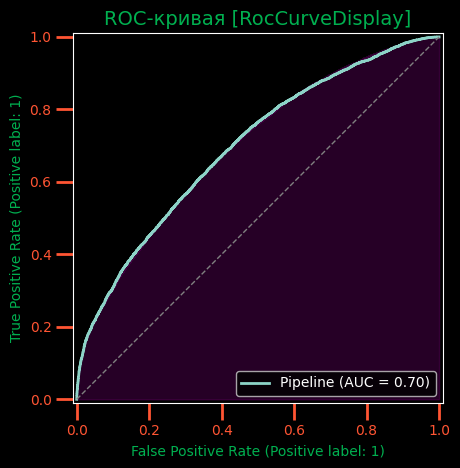

In [35]:
### На тесте
### Your code is here

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipe, X_test, y_test)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.fill_between(fpr, tpr, color='purple', alpha=0.3)

plt.title('ROC-кривая [RocCurveDisplay]')

plt.show()


Постройте PR-кривые на трейне и на тесте. Посчитайте PR-AUC

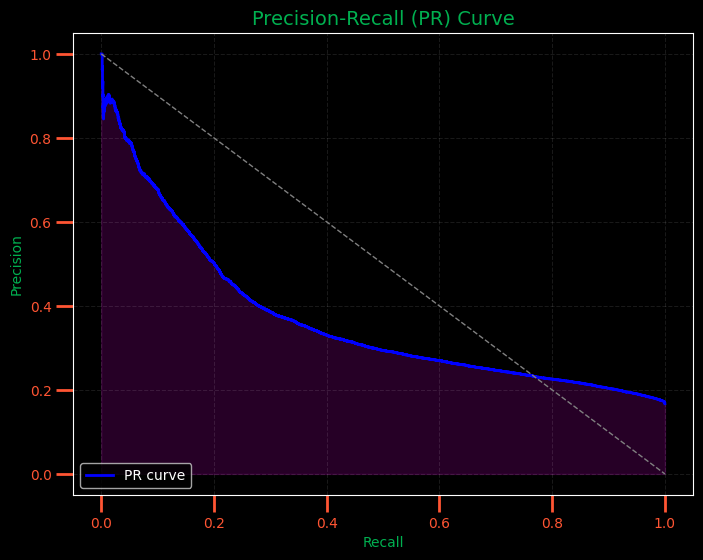

In [58]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

### На трейне
### Your code is here

precision, recall, thresholds = precision_recall_curve(y_train, pipe.predict_proba(X_train)[:, 1])

# Построение PR-кривой с помощью объекта PrecisionRecallDisplay
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)

# Построение PR-кривой с настройками внешнего вида
plt.figure(figsize=(8, 6))  # Размер графика
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')  # Цвет, ширина линии и название кривой
plt.plot([0, 1], [1, 0], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии
plt.xlabel('Recall')  # Подпись оси x
plt.ylabel('Precision')  # Подпись оси y
plt.title('Precision-Recall (PR) Curve')  # Название графика
plt.grid(True, alpha=0.1, linestyle="--")  # Включение сетки
plt.legend(loc="lower left")  # Расположение легенды

# Закраска площади под PR-кривой
plt.fill_between(recall, precision, color='purple', alpha=0.3)

# Отображение графика
plt.show()


In [59]:
print(f"PR-AUC на трейне: {round(auc(recall, precision), 3)}")

PR-AUC на трейне: 0.366


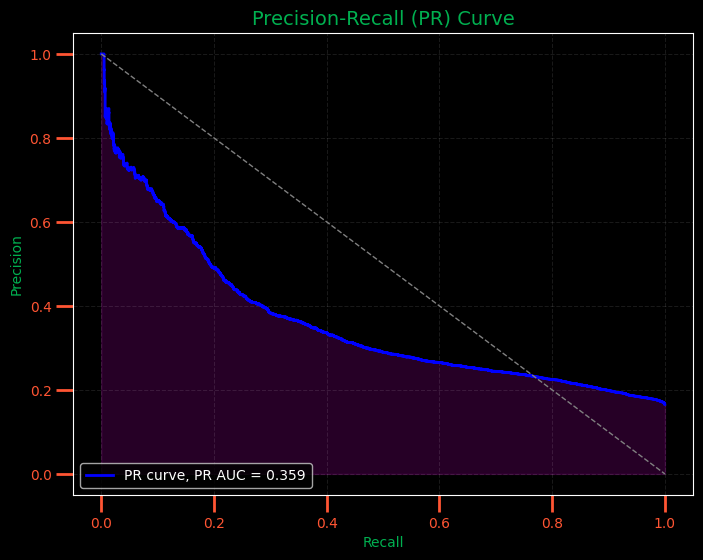

In [93]:
### На тесте
### Your code is here

from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:, 1])

# Построение PR-кривой с помощью объекта PrecisionRecallDisplay
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)

# Построение PR-кривой с настройками внешнего вида
plt.figure(figsize=(8, 6))  # Размер графика
plt.plot(recall, precision, color='blue', lw=2, label=f"PR curve, PR AUC = {round(auc(recall, precision), 3)}")  # Цвет, ширина линии и название кривой
plt.plot([0, 1], [1, 0], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии
plt.xlabel('Recall')  # Подпись оси x
plt.ylabel('Precision')  # Подпись оси y
plt.title('Precision-Recall (PR) Curve')  # Название графика
plt.grid(True, alpha=0.1, linestyle="--")  # Включение сетки
plt.legend(loc="lower left")  # Расположение легенды

# Закраска площади под PR-кривой
plt.fill_between(recall, precision, color='purple', alpha=0.3)

# Отображение графика
plt.show()

In [61]:
print(f"PR-AUC на тесте: {round(auc(recall, precision), 3)}")

PR-AUC на тесте: 0.359


Построим калибровочную кривую. Хорошо ли откалиброван обученный классификатор? Сравним с калибровочной кривой для случайного классификатора!

C:\Users\danil\AppData\Local\Temp\ipykernel_5808\360390955.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated", color='gray')


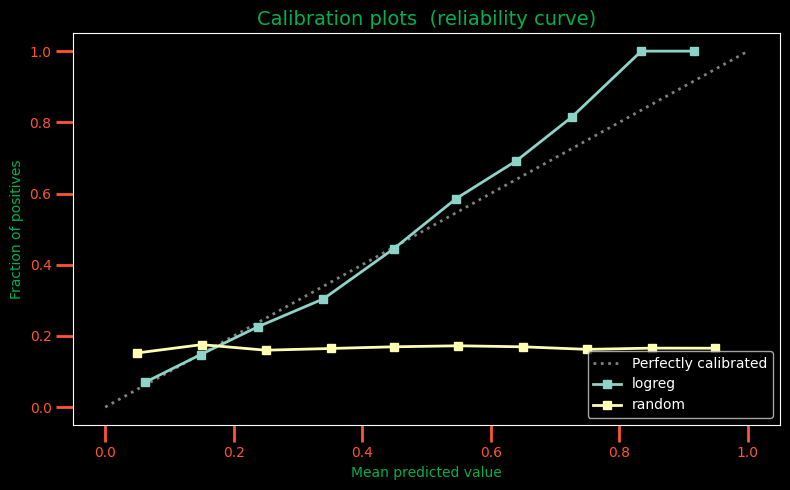

In [90]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated", color='gray')

### Предсказания модели на тесте и соответствующая калибровочная кривая
prob_pos = pipe.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="logreg")

### Пусть наши предсказания - случайные, то есть для каждого объекта
### вероятность принадлежности + классу это просто случайное число [0; 1]
prob_pos = np.random.uniform(size=(X_test.shape[0],))
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="random")

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')
plt.tight_layout()